Epoch 0, Loss: 0.7419
Epoch 50, Loss: 0.5595
Epoch 100, Loss: 0.5221
Epoch 150, Loss: 0.5081
Epoch 200, Loss: 0.5006
Epoch 250, Loss: 0.4955
Epoch 300, Loss: 0.4914
Epoch 350, Loss: 0.4879
Epoch 400, Loss: 0.4846
Epoch 450, Loss: 0.4813


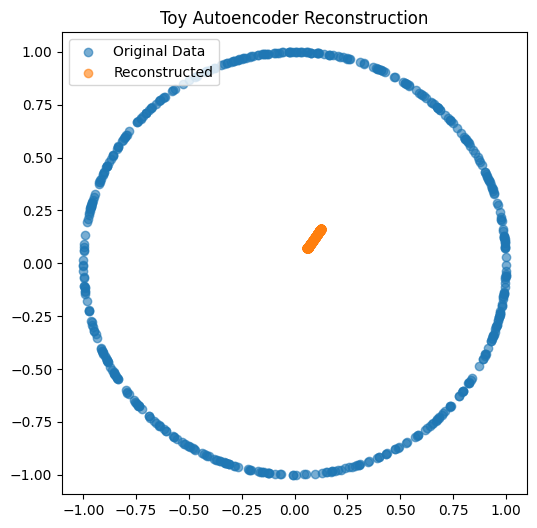

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate toy dataset: points in 2D around a circle
n_samples = 500
theta = 2 * np.pi * np.random.rand(n_samples)
X = np.stack((np.cos(theta), np.sin(theta)), axis=1)  # shape (500, 2)

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

# Autoencoder architecture
input_dim = 2
latent_dim = 1  # compress to 1D
lr = 0.1
epochs = 500

# Initialise weights and biases
W_enc = np.random.randn(input_dim, latent_dim) * 0.1
b_enc = np.zeros((1, latent_dim))
W_dec = np.random.randn(latent_dim, input_dim) * 0.1
b_dec = np.zeros((1, input_dim))

losses = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    z_lin = X @ W_enc + b_enc          # encoder linear
    z = sigmoid(z_lin)                 # encoder activation
    x_hat_lin = z @ W_dec + b_dec      # decoder linear
    x_hat = sigmoid(x_hat_lin)         # decoder activation (reconstruction)

    # Compute loss (MSE)
    loss = np.mean((X - x_hat)**2)
    losses.append(loss)

    # Backward pass
    d_loss = 2 * (x_hat - X) / X.shape[0]
    d_xhat_lin = d_loss * d_sigmoid(x_hat_lin)
    dW_dec = z.T @ d_xhat_lin
    db_dec = np.sum(d_xhat_lin, axis=0, keepdims=True)
    d_z = d_xhat_lin @ W_dec.T
    d_z_lin = d_z * d_sigmoid(z_lin)
    dW_enc = X.T @ d_z_lin
    db_enc = np.sum(d_z_lin, axis=0, keepdims=True)

    # Update weights
    W_enc -= lr * dW_enc
    b_enc -= lr * db_enc
    W_dec -= lr * dW_dec
    b_dec -= lr * db_dec

    # Print loss occasionally
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot final reconstructions
x_hat_final = sigmoid(sigmoid(X @ W_enc + b_enc) @ W_dec + b_dec)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], label='Original Data', alpha=0.6)
plt.scatter(x_hat_final[:, 0], x_hat_final[:, 1], label='Reconstructed', alpha=0.6)
plt.legend()
plt.title("Toy Autoencoder Reconstruction")
plt.axis('equal')
plt.show()


Epoch 0, Loss: 0.501271
Epoch 100, Loss: 0.259169
Epoch 200, Loss: 0.258611
Epoch 300, Loss: 0.258189
Epoch 400, Loss: 0.257781
Epoch 500, Loss: 0.257379
Epoch 600, Loss: 0.256986
Epoch 700, Loss: 0.256612
Epoch 800, Loss: 0.256267
Epoch 900, Loss: 0.255959
Epoch 1000, Loss: 0.255690
Epoch 1100, Loss: 0.255460
Epoch 1200, Loss: 0.255263
Epoch 1300, Loss: 0.255096
Epoch 1400, Loss: 0.254954
Epoch 1500, Loss: 0.254832
Epoch 1600, Loss: 0.254727
Epoch 1700, Loss: 0.254636
Epoch 1800, Loss: 0.254557
Epoch 1900, Loss: 0.254487
Epoch 2000, Loss: 0.254425
Epoch 2100, Loss: 0.254370
Epoch 2200, Loss: 0.254321
Epoch 2300, Loss: 0.254276
Epoch 2400, Loss: 0.254235
Epoch 2500, Loss: 0.254198
Epoch 2600, Loss: 0.254164
Epoch 2700, Loss: 0.254132
Epoch 2800, Loss: 0.254103
Epoch 2900, Loss: 0.254076
Epoch 3000, Loss: 0.254051
Epoch 3100, Loss: 0.254027
Epoch 3200, Loss: 0.254005
Epoch 3300, Loss: 0.253983
Epoch 3400, Loss: 0.253963
Epoch 3500, Loss: 0.253944
Epoch 3600, Loss: 0.253926
Epoch 3700, L

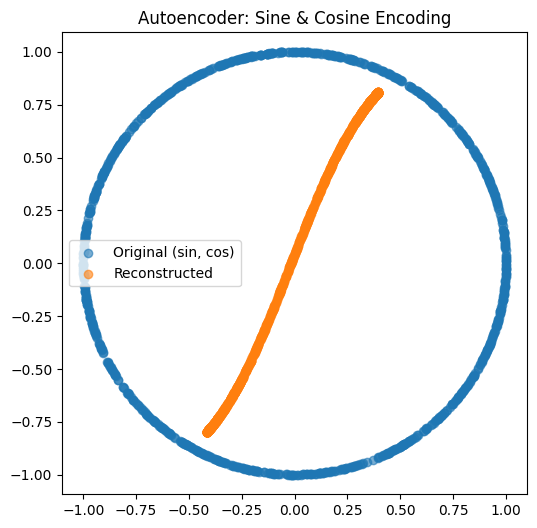

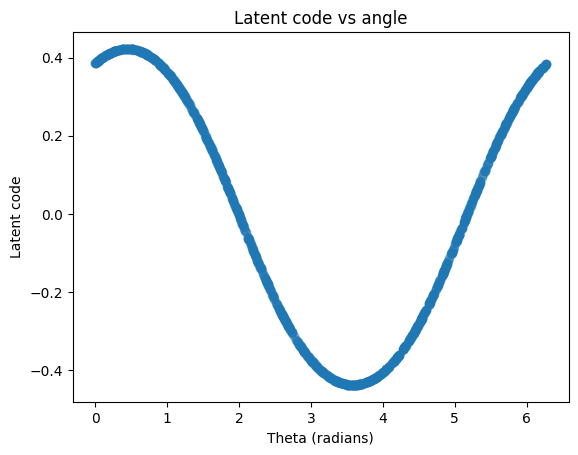

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data on the unit circle
n_samples = 1000
theta = np.random.uniform(0, 2*np.pi, size=n_samples)
X = np.stack((np.sin(theta), np.cos(theta)), axis=1)  # shape (n_samples, 2)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

# Use tanh instead, better for symmetric [-1, 1] data
def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.tanh(x)**2

# Network architecture
input_dim = 2
latent_dim = 1
lr = 0.1
epochs = 10000

# Initialize weights
W_enc = np.random.randn(input_dim, latent_dim) * 0.1
b_enc = np.zeros((1, latent_dim))
W_dec = np.random.randn(latent_dim, input_dim) * 0.1
b_dec = np.zeros((1, input_dim))

losses = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    z_lin = X @ W_enc + b_enc
    z = tanh(z_lin)
    x_hat_lin = z @ W_dec + b_dec
    x_hat = tanh(x_hat_lin)

    # Loss: mean squared error
    loss = np.mean((X - x_hat)**2)
    losses.append(loss)

    # Backward pass
    d_loss = 2 * (x_hat - X) / X.shape[0]
    d_xhat_lin = d_loss * d_tanh(x_hat_lin)
    dW_dec = z.T @ d_xhat_lin
    db_dec = np.sum(d_xhat_lin, axis=0, keepdims=True)

    d_z = d_xhat_lin @ W_dec.T
    d_z_lin = d_z * d_tanh(z_lin)
    dW_enc = X.T @ d_z_lin
    db_enc = np.sum(d_z_lin, axis=0, keepdims=True)

    # Update
    W_enc -= lr * dW_enc
    b_enc -= lr * db_enc
    W_dec -= lr * dW_dec
    b_dec -= lr * db_dec

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# Plot reconstructions
z_final = tanh(X @ W_enc + b_enc)
x_hat_final = tanh(z_final @ W_dec + b_dec)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='Original (sin, cos)', alpha=0.6)
plt.scatter(x_hat_final[:, 0], x_hat_final[:, 1], label='Reconstructed', alpha=0.6)
plt.legend()
plt.axis('equal')
plt.title("Autoencoder: Sine & Cosine Encoding")
plt.show()

# Optional: plot latent code vs true angle
plt.figure()
plt.scatter(theta, z_final[:, 0], alpha=0.5)
plt.xlabel("Theta (radians)")
plt.ylabel("Latent code")
plt.title("Latent code vs angle")
plt.show()
